# Проект e-commerce: вариант 1 
    

---

## customers (кто заказал, паспорт, адрес)
### *olist_customers_datase.csv* — таблица с уникальными идентификаторами пользователей


* customer_id              — позаказный идентификатор пользователя
* customer_unique_id       —  уникальный идентификатор пользователя  (аналог номера паспорта)
* customer_zip_code_prefix —  почтовый индекс пользователя
* customer_city            —  город доставки пользователя
* customer_state           —  штат доставки пользователя

## orders (номер чека, кто заказал, статус заказа, даты)
### olist_orders_dataset.csv —  таблица заказов

* order_id —  уникальный идентификатор заказа (номер чека)
* customer_id —  позаказный идентификатор пользователя
* order_status —  статус заказа
* order_purchase_timestamp —  время создания заказа
* order_approved_at —  время подтверждения оплаты заказа
* order_delivered_carrier_date —  время передачи заказа в логистическую службу
* order_delivered_customer_date —  время доставки заказа
* order_estimated_delivery_date —  обещанная дата доставки
##### Уникальные статусы заказов
* created —  создан
* approved —  подтверждён
* invoiced —  выставлен счёт
* processing —  в процессе сборки заказа
* shipped —  отгружен со склада
* delivered —  доставлен пользователю
* unavailable —  недоступен
* canceled —  отменён


## items (инфо по товарам)
### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

* order_id —  уникальный идентификатор заказа (номер чека)
* order_item_id —  идентификатор товара внутри одного заказа
* product_id —  ид товара (аналог штрихкода)
* seller_id — ид производителя товара
* shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
* price —  цена за единицу товара
* freight_value —  вес товара

---

In [1]:
#импортируем все нужные библиотеки

import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import warnings

In [2]:
#настройка стиля графиков

sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,8)}
        )

In [3]:
# отключаем предупреждения

warnings.filterwarnings('ignore')

In [4]:
customers = pd.read_csv('~/first_project_data/olist_customers_dataset.csv')
orders    = pd.read_csv('~/first_project_data/olist_orders_dataset.csv')
items     = pd.read_csv('~/first_project_data/olist_order_items_dataset.csv')

---

### Посмотрим на датафрейм *olist_customers_dataset*

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.shape

(99441, 5)

In [7]:
customers.isna().sum() #пропущенных значений нет

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [8]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [9]:
customers.loc[customers.duplicated()] #Посмотрим есть ли дубликаты 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [10]:
customers.customer_id.nunique() == customers.shape[0] 

True

In [11]:
customers.customer_unique_id.nunique()

96096

In [12]:
customers.customer_state.value_counts(normalize=True).head()

SP    0.419807
RJ    0.129242
MG    0.117004
RS    0.054967
PR    0.050734
Name: customer_state, dtype: float64

#### Комментарий по датафрейму:
1. Датафрейм содержит **99441** строку и **5** столбцов;
2. Пропущенных значений в датафрейме нет, отсутствуют дубликаты строк;
3. Типы данных соответсвуют ожиданиям, менять их не нужно;
4. **96096** Уникальных идентификаторов пользоватей(customer_unique_id);
5. На Штат **SP** приходится почти **42%** от всех доставок пользователей

---

### Посмотрим на датафрейм *olist_orders_dataset*

In [13]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
orders.shape

(99441, 8)

In [15]:
orders.dtypes 

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

###### Сразу поменяем тип данных для столбцов хранящую в себе дату

In [16]:
orders['order_purchase_timestamp']      = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at']             = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date']  = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)


In [17]:
orders.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [18]:
orders.loc[orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [19]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
orders.customer_id.nunique() == orders.order_id.nunique()

True

#### Комментарий по датафрейму:
1. Датафрейм содержит **99441** строку и **8** столбцов;
2. типы данных для столбцов, хранящую в себе дату, требовали изменения;
3. дубликаты строк - отсутствуют;
4. количество чеков и количество идентификаторов пользователей совпадает;
5. имееются пропущенные значения в столбцах отвечающих за время оплаты, время поступления в логистическую службу и время доставки товара. Тогда, скорее всего, пустые значения могут говорить нам о том, что:
    клиент заказал, но не оплатил товар,
    клиент заказал, но товар еще не передан в логистическую службу, товар еще не доставлен, товар был потерян на
    этапе передачи в логистическую службу или при доставке.

---

### Посмотрим на датафрейм *olist_order_items_dataset*

In [21]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [22]:
items.shape

(112650, 7)

In [23]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [24]:
items['shipping_limit_date'] = pd.to_datetime(items.shipping_limit_date)
#поменял тип данных для столбца содержащего дату

In [25]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [26]:
items.loc[items.duplicated()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


In [27]:
items.seller_id.nunique()

3095

In [28]:
items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

#### Комментарий по датафрейму:
1. Датафрейм содержит **112650** строку и **7** столбцов;
2. тип данных для столбца, хранящий в себе дату, требовал изменения;
3. дубликаты строк - отсутствуют;
4. пропущенные значения - отсутствуют;
5. всего имеется **3095** производителей товаров;
6. медианное значение цены товара примерно **75$**.

---

---

## Задачи проекта

1. Сколько у нас пользователей, которые совершили покупку только один раз? 


2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?


3. По каждому товару определить, в какой день недели товар чаще всего покупается.


4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. 


5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.


6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться покупкой. Обосновать свой выбор ты можешь с помощью фактов оплат, статусов заказов и других имеющихся данных.

---

### Сколько у нас пользователей, которые совершили покупку только один раз?

In [29]:
df_merge_cust_ord = customers.merge(orders, on='customer_id')


#заджоинили таблицу с уникальными идентификаторами пользователей с таблицей заказов

In [30]:
df_merge_cust_ord.shape

#проверим количество столбцов и строк

(99441, 12)

In [31]:
df_merge_cust_ord.head()

#посмотрим на структуру

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [32]:
order_status_pay = ['approved', 'processing', 'shipped', 'delivered']

#Отбираем статусы, которые будем считать за покупку

In [33]:
order_status_pay_query = df_merge_cust_ord.query('order_status == @order_status_pay')

# фильтрация по интересующим нам статусам покупок

In [34]:
order_status_pay_query.groupby('customer_unique_id', as_index=False) \
    .agg({'order_approved_at': 'count'}) \
    .query('order_approved_at == "1"').shape[0]  

# Группируем по уникальным id
# считаем количество покупок  
# выводим количество покупок равным одному

91804

In [35]:
df_merge_cust_ord.query('order_approved_at == "NaN" & order_status == "delivered"') \
            .sort_values('order_purchase_timestamp') \
            [['customer_unique_id', 'order_status', 'order_approved_at', 'order_purchase_timestamp']]

,customer_unique_id,order_status,order_approved_at,order_purchase_timestamp
44050,6ff8b0d7b35d5c945633b8d60165691b,delivered,NaT,2017-01-19 12:48:08
20863,d49f3dae6bad25d05160fc17aca5942d,delivered,NaT,2017-01-19 22:26:59
13890,c8822fce1d0bfa7ddf0da24fff947172,delivered,NaT,2017-02-17 13:05:55
39286,c094ac95fcd52f821809ec232a7a6956,delivered,NaT,2017-02-17 15:53:27
52849,5a4fa4919cbf2b049e72be460a380e5b,delivered,NaT,2017-02-17 17:21:55
8970,c4c0011e639bdbcf26059ddc38bd3c18,delivered,NaT,2017-02-18 11:04:19
71548,91efb7fcabc17925099dced52435837f,delivered,NaT,2017-02-18 12:45:31
85378,e1f01a1bd6485e58ad3c769a5427d8a8,delivered,NaT,2017-02-18 13:29:47
60039,8a9a08c7ca8900a200d83cf838a07e0b,delivered,NaT,2017-02-18 14:40:00
22703,79af1bbf230a2630487975aa5d7d6220,delivered,NaT,2017-02-18 15:52:27


имеются заказы которые не были оплачены, но были доставлены **ИЛИ** были оплачены, но время об оплате не было записано по разным причинам. Если моя вторая теория верна, то можно заметить, что 'сбои' на отдельные покупки, приходились только на 19 января и на интервал времени с 17 февраля по 19 февраля 2017 года. Так же, я предполагаю, что эти товары могли быть бесплатны для пользователей, то есть они их выиграли во все различных конкурсах или же оплата произошла за накопленные 'баллы' платформы.  Такие позиции я не буду относить к 'покупкам'

### Ответ : 91804

---

---

### Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [36]:
df_merge_cust_ord.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


За не доставленные заказы будем считать заказы со статусом заказа unavailable и canceled

In [37]:
df_not_delivered = df_merge_cust_ord.query('order_status == ("unavailable", "canceled")')

In [38]:
df_not_delivered.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
46,f34a6e874087ec1f0e3dab9fdf659c5d,233896de79986082f1f479f1f85281cb,38300,ituiutaba,MG,6e98de3a85c84ead6689189b825d35b5,canceled,2018-03-15 10:07:02,2018-03-15 10:29:33,NaT,NaT,2018-04-09
288,5bfe800011656c0afb81db64519982db,0071f46a072a9ae25bbe4438b15efe9c,16011,aracatuba,SP,df8c077268f7f3baaac0892eb3143642,unavailable,2017-02-01 00:04:17,2017-02-01 00:30:55,NaT,NaT,2017-03-10
373,b08064e24083fee8fbe8797902b07ecd,035f60af6e7d7f78470e9443be08d339,28495,aperibe,RJ,c609f82bcf7a90292a5940205ebd7e93,unavailable,2018-05-13 16:45:55,2018-05-13 17:11:58,NaT,NaT,2018-06-05
378,3ba47b09546c2da91ef141efce2d5888,b8c37ee810b38c416022e1c9f51e740c,32140,contagem,MG,a402af38a74c44926247db438245d95c,canceled,2018-01-30 22:12:10,2018-01-30 22:34:14,NaT,NaT,2018-03-06
380,cfffbb322333151f8df6398a8c3340db,0dc0731aafd5659410244092b0dc7d65,5093,sao paulo,SP,f63cd97f8f1db2eb266fb3bc2b4a95f3,canceled,2017-06-19 14:07:04,2017-06-19 14:23:18,NaT,NaT,2017-06-30


In [39]:
df_not_delivered['orders_month'] = df_not_delivered.order_purchase_timestamp.dt.strftime('%Y-%m')
#Создал новую колонку, которая содержит только месяц и год

In [40]:
df_not_delivered_month = df_not_delivered.groupby(['orders_month', 'order_status'] , as_index=False) \
    .agg({'order_id': 'count'}) \
    .pivot(index='orders_month', columns='order_status', values='order_id').reset_index().fillna(0)

# Пивот для наглядности, заменил пустые значения на ноль для более точного расчета за весь период подаж

In [41]:
df_not_delivered_month.head()

order_status,orders_month,canceled,unavailable
0,2016-09,2.0,0.0
1,2016-10,24.0,7.0
2,2017-01,3.0,10.0
3,2017-02,17.0,45.0
4,2017-03,33.0,32.0


In [42]:
df_not_delivered_month.canceled.mean().round(2)

26.04

In [43]:
df_not_delivered_month.unavailable.mean().round(2)

25.38

In [44]:
df_not_delivered.groupby('orders_month' , as_index=False) \
    .agg({'order_id': 'count'}).order_id.mean().round(2)

51.42

### Ответ :
- в среднем не доставляется в месяц **51.42** заказа
- в среднем по причине **'Canceled' 26.04** заказов
- в среднем по причине **'Unavailable' 25.38**  заказов

---

---

### По каждому товару определить, в какой день недели товар чаще всего покупается.

In [45]:
orders_items = orders.merge(items, on='order_id', how='inner')

 #Сджоиним датафрейм с заказами и датафреймом с товарами из заказов

In [46]:
orders_items.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [47]:
order_status_pay

# из первого задания определили какие статусы считаем за покупку

['approved', 'processing', 'shipped', 'delivered']

In [48]:
orders_items_pay = orders_items.query('order_status == @order_status_pay')

# отфильтравали по интересующим статусам покупок

In [49]:
orders_items_pay = orders_items_pay.dropna(subset=['order_approved_at'])

# Удалим заказы без подтверждения оплаты

In [50]:
orders_items_pay['day_week'] = orders_items.order_approved_at.dt.day_name()

# создал колонку с днем недели времени подтверждения оплаты покупки

In [51]:
orders_items_pay.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,day_week
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,Thursday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,Tuesday


In [52]:
product_df = orders_items_pay[['product_id', 'order_item_id', 'day_week']]

#Возьмем для наглядности только нужные колонки

In [53]:
product_df.head()

,product_id,order_item_id,day_week
0,87285b34884572647811a353c7ac498a,1,Monday
1,595fac2a385ac33a80bd5114aec74eb8,1,Thursday
2,aa4383b373c6aca5d8797843e5594415,1,Wednesday
3,d0b61bfb1de832b15ba9d266ca96e5b0,1,Saturday
4,65266b2da20d04dbe00c5c2d3bb7859e,1,Tuesday


In [54]:
product_df_pivot = product_df.groupby(['product_id', 'day_week'], as_index=False) \
    .agg({'order_item_id': 'sum'}) \
    .pivot(index='product_id', columns='day_week', values='order_item_id').fillna(0)


#  Сгрупируем по продукту и дню недели
#  Так как в одном заказе может быть несколько одинаковых продуктов, необходимо посчитать их общее количество
#  И сразу же пивотним таблицу для лучшей наглядности
#  заменим пустые значения на '0'

In [55]:
product_df_pivot.head()

# посмотрим что получилось

day_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
product_id,,,,,,,
00066f42aeeb9f3007548bb9d3f33c38,0.0,0.0,0.0,1.0,0.0,0.0,0.0
00088930e925c41fd95ebfe695fd2655,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0009406fd7479715e4bef61dd91f2462,1.0,0.0,0.0,0.0,0.0,0.0,0.0
000b8f95fcb9e0096488278317764d19,1.0,0.0,0.0,0.0,0.0,0.0,1.0
000d9be29b5207b54e86aa1b1ac54872,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
#Добавим колонку с максимальным числом продажи в определенный день недели
product_df_pivot['max_day'] = product_df_pivot.idxmax(axis=1) 

#Дополнительно добавим колонку, где показано число продаж в отобранный день недели
product_df_pivot['count_pay'] = product_df_pivot.max(axis=1)

In [57]:
#Отсортируем по убыванию и сбросим индекс

product_df_pivot = product_df_pivot.sort_values('count_pay', ascending=False).reset_index()

In [58]:
#В результируещем датафрейме оставим только нужные колонки

product_rusult = product_df_pivot[['product_id', 'max_day', 'count_pay']]

In [59]:
product_rusult.head()

day_week,product_id,max_day,count_pay
0,ee3d532c8a438679776d222e997606b3,Saturday,214.0
1,422879e10f46682990de24d770e7f83d,Friday,211.0
2,9571759451b1d780ee7c15012ea109d4,Thursday,210.0
3,270516a3f41dc035aa87d220228f844c,Monday,145.0
4,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,143.0


### Ответ :
в качестве ответа **product_rusult**

---

---

### Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [60]:
full_df = df_merge_cust_ord.merge(items, on='order_id') #полный датафрейм

In [61]:
full_df.head() #взглянем на него

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


In [62]:
full_df['order_month'] = full_df.order_approved_at.dt.strftime('%Y-%m')

#Добавим колонку содержащую год и месяц подтверждения оплаты заказа

In [63]:
order_status_pay

# из первого задания определили какие статусы считаем за покупку

['approved', 'processing', 'shipped', 'delivered']

In [64]:
order_week = full_df.query('order_status == @order_status_pay')
print(order_week.shape[0])

# отфильтравали по интересующим статусам покупок

111742


In [65]:
order_week = order_week.dropna(subset=['order_approved_at'])
print(order_week.shape[0])

# Удалим заказы без подтверждения оплаты (Таких было 15)

111727


In [66]:
order_week['number_weeks_in_month'] = round(order_week.order_approved_at.dt.daysinmonth / 7, 2)

# новая колонка с количеством недель в месяце, округлим до двух знаков после запятой

In [67]:
order_week_count = order_week.groupby(['customer_unique_id', 'order_month', 'number_weeks_in_month'], as_index=False) \
    .agg({'order_id': 'count'}) \
    .rename(columns={'order_id': 'count_pay'}) \
    .sort_values('count_pay', ascending=False)

#сгрупировали по уникальному пользователю, месяцу, и количеству недель в месяце
# посчитали количество покупок в месяце
# переименовал столбец 
# отсортировал по убыванию количества покупок

    

In [68]:
order_week_count.head() #взглянем что вышло


,customer_unique_id,order_month,number_weeks_in_month,count_pay
75624,c8460e4251689ba205045f3ea17884a1,2018-08,4.43,24
26182,4546caea018ad8c692964e3382debd19,2017-07,4.43,21
39911,698e1cf81d01a3d389d96145f7fa6df8,2017-08,4.43,20
74020,c402f431464c72e27330a67f7b94d4fb,2018-02,4.00,20
5818,0f5ac8d5c31de21d2f25e24be15bbffb,2017-11,4.29,18


In [69]:
order_week_count['purchases_week'] = order_week_count.count_pay / order_week_count.number_weeks_in_month

#новая колонка со средним количестовм покупок в неделю в определенном месяце

In [70]:
purchases_week_result = order_week_count.groupby('customer_unique_id') \
    .purchases_week.mean() \
    .sort_values(ascending=False) \
    .reset_index()

#в результирующей таблице выведем среднее количество покупок пользователем по неделям
# для этого сгрупируем по пользователю, найдем среднее покупок в неделю, отсортируем по убыванию и сбросим индекс

In [71]:
purchases_week_result.head()

,customer_unique_id,purchases_week
0,c8460e4251689ba205045f3ea17884a1,5.417607
1,c402f431464c72e27330a67f7b94d4fb,5.000000
2,4546caea018ad8c692964e3382debd19,4.740406
3,698e1cf81d01a3d389d96145f7fa6df8,4.514673
4,0f5ac8d5c31de21d2f25e24be15bbffb,4.195804


### Ответ :
в качестве ответа **purchases_week_result**

---

---

### Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [72]:
full_df_copy = full_df.copy() 

#Cделал копию ДФ

In [73]:
df = full_df_copy.query('order_status == @order_status_pay').dropna(subset=['order_approved_at']) \
                [['customer_unique_id', 'order_month']]

# отфильтравал по интересующим статусам покупок, удалил заказы без подтверждения оплаты
# и взял нужные на данном этапе колонки


In [74]:
df = df.query('order_month >= "2017-01" and order_month <= "2018-03"')

# Отфильтровал нужный промежуток времени. По условию нам нужно найти кагорту на третий месяц
# и для того чтоб правильно оценить кагорты с октября по декабрь зацепим даты покупок по март 2018 года

In [75]:
df.head()

,customer_unique_id,order_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03
5,4c93744516667ad3b8f1fb645a3116a4,2017-09
6,addec96d2e059c80c30fe6871d30d177,2018-02


In [76]:
len(df) 

74218

In [77]:
user = df.groupby('customer_unique_id')['order_month']\
                                    .min().reset_index()
user.columns = ['customer_unique_id', 'first_pay']

# создал новый ДФ где у каждого кастомера отображен месяц первой покупки

In [78]:
user.head()

,customer_unique_id,first_pay
0,0000f46a3911fa3c0805444483337064,2017-03
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10
2,0004aac84e0df4da2b147fca70cf8255,2017-11
3,00053a61a98854899e70ed204dd4bafe,2018-02
4,0005e1862207bf6ccc02e4228effd9a0,2017-03


In [79]:
len(user)

62979

In [80]:
min_date = df.order_month.min() 
max_date = df.order_month.max()

In [81]:
month = pd.DataFrame(pd.date_range(min_date, max_date, freq='MS'))


# сгенерируем последовательность от минимального до максимального месяца в ДФ

In [82]:
month.columns = ['month'] 

# переименовал столюец

In [83]:
month['month'] = month.month.dt.strftime('%Y-%m')

# оставим только год и месяц

In [84]:
month

,month
0,2017-01
1,2017-02
2,2017-03
3,2017-04
4,2017-05
5,2017-06
6,2017-07
7,2017-08
8,2017-09
9,2017-10


In [85]:
user['key'] = 1 
month['key'] = 1

# Добавил ключи чтоб по ним объеденить таблицы 

In [86]:
template = user.merge(month, on='key')[['customer_unique_id', 'first_pay', 'month']] 

#колонка month нам понадобиться в следующих действиях 

In [87]:
template.head()

# взглянем

,customer_unique_id,first_pay,month
0,0000f46a3911fa3c0805444483337064,2017-03,2017-01
1,0000f46a3911fa3c0805444483337064,2017-03,2017-02
2,0000f46a3911fa3c0805444483337064,2017-03,2017-03
3,0000f46a3911fa3c0805444483337064,2017-03,2017-04
4,0000f46a3911fa3c0805444483337064,2017-03,2017-05


In [88]:
len(template)

944685

In [89]:
template = template[template.month >= template.first_pay]

#оставим только строки где дата первой покупки не меньше или равна month

In [90]:
len(template)

383970

In [91]:
template.head()

,customer_unique_id,first_pay,month
2,0000f46a3911fa3c0805444483337064,2017-03,2017-03
3,0000f46a3911fa3c0805444483337064,2017-03,2017-04
4,0000f46a3911fa3c0805444483337064,2017-03,2017-05
5,0000f46a3911fa3c0805444483337064,2017-03,2017-06
6,0000f46a3911fa3c0805444483337064,2017-03,2017-07


In [92]:
df.head()

,customer_unique_id,order_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
3,259dac757896d24d7702b9acbbff3f3c,2018-03
5,4c93744516667ad3b8f1fb645a3116a4,2017-09
6,addec96d2e059c80c30fe6871d30d177,2018-02


In [93]:
df['orders'] = 0 

#добавлю колонку, в которой пока будут записаны нули, по ней в следующем действии посчитаем количество
#покупок в определенный месяц отдельными кастомерами 

In [94]:
orders_month = df.groupby(['customer_unique_id', 'order_month'], as_index=False) \
    .agg({'orders':'count'}) \
    .rename(columns={'order_month': 'month'})

# сгрупировал по кастомеру и месяцу покупки
# посчитал количество покупок в отдельный месяц
# переименовал колонку для того чтоб потом смерджить по ней

In [95]:
orders_month.head()

,customer_unique_id,month,orders
0,0000f46a3911fa3c0805444483337064,2017-03,1
1,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
2,0004aac84e0df4da2b147fca70cf8255,2017-11,1
3,00053a61a98854899e70ed204dd4bafe,2018-02,2
4,0005e1862207bf6ccc02e4228effd9a0,2017-03,1


In [96]:
template.head()

,customer_unique_id,first_pay,month
2,0000f46a3911fa3c0805444483337064,2017-03,2017-03
3,0000f46a3911fa3c0805444483337064,2017-03,2017-04
4,0000f46a3911fa3c0805444483337064,2017-03,2017-05
5,0000f46a3911fa3c0805444483337064,2017-03,2017-06
6,0000f46a3911fa3c0805444483337064,2017-03,2017-07


In [97]:
report = template.merge(orders_month, on=['customer_unique_id', 'month'], how='left')
                        
#left что бы остались пропуски

In [98]:
report['active'] = (report.orders > 0)*1 #колонка которая показывает была ли активность кастомера в месяц 'month'

In [99]:
report.head()

,customer_unique_id,first_pay,month,orders,active
0,0000f46a3911fa3c0805444483337064,2017-03,2017-03,1.0,1
1,0000f46a3911fa3c0805444483337064,2017-03,2017-04,NaN,0
2,0000f46a3911fa3c0805444483337064,2017-03,2017-05,NaN,0
3,0000f46a3911fa3c0805444483337064,2017-03,2017-06,NaN,0
4,0000f46a3911fa3c0805444483337064,2017-03,2017-07,NaN,0


In [100]:
retention = report.pivot_table(index='first_pay', columns='month', values='active', aggfunc='mean')

#в индексы кинем дату первой покупки в колонки пойдут наши монсы, посчитаем среднее по колонке актив

In [101]:
retention

# ну вот и тут мы будем искать ответ на вопрос задания,
# для наглядности просится heatmap, сделаем его в следующей ячейке

month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
first_pay,,,,,,,,,,,,,,,
2017-01,1.0,0.005666,0.002833,0.001416,0.004249,0.001416,0.004249,0.001416,0.001416,0.000000,0.002833,0.002833,0.007082,0.004249,0.001416
2017-02,NaN,1.000000,0.002407,0.002407,0.001805,0.004212,0.001203,0.002407,0.001805,0.000602,0.001805,0.001203,0.003008,0.001203,0.001805
2017-03,NaN,NaN,1.000000,0.005045,0.003492,0.003492,0.003492,0.001552,0.001552,0.003104,0.003104,0.001164,0.003492,0.001164,0.002328
2017-04,NaN,NaN,NaN,1.000000,0.006119,0.002185,0.001748,0.002622,0.002622,0.003497,0.002622,0.003497,0.001748,0.002185,0.000874
2017-05,NaN,NaN,NaN,NaN,1.000000,0.005387,0.004820,0.003969,0.003119,0.003402,0.004253,0.001418,0.002552,0.002552,0.002835
2017-06,NaN,NaN,NaN,NaN,NaN,1.000000,0.004513,0.003546,0.003868,0.002579,0.003224,0.003546,0.002257,0.001289,0.002257
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.005304,0.003182,0.001856,0.003447,0.001856,0.003182,0.001061,0.001856
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006770,0.003627,0.002660,0.003868,0.005319,0.002660,0.002660
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.006613,0.004898,0.003429,0.004164,0.002694,0.002204


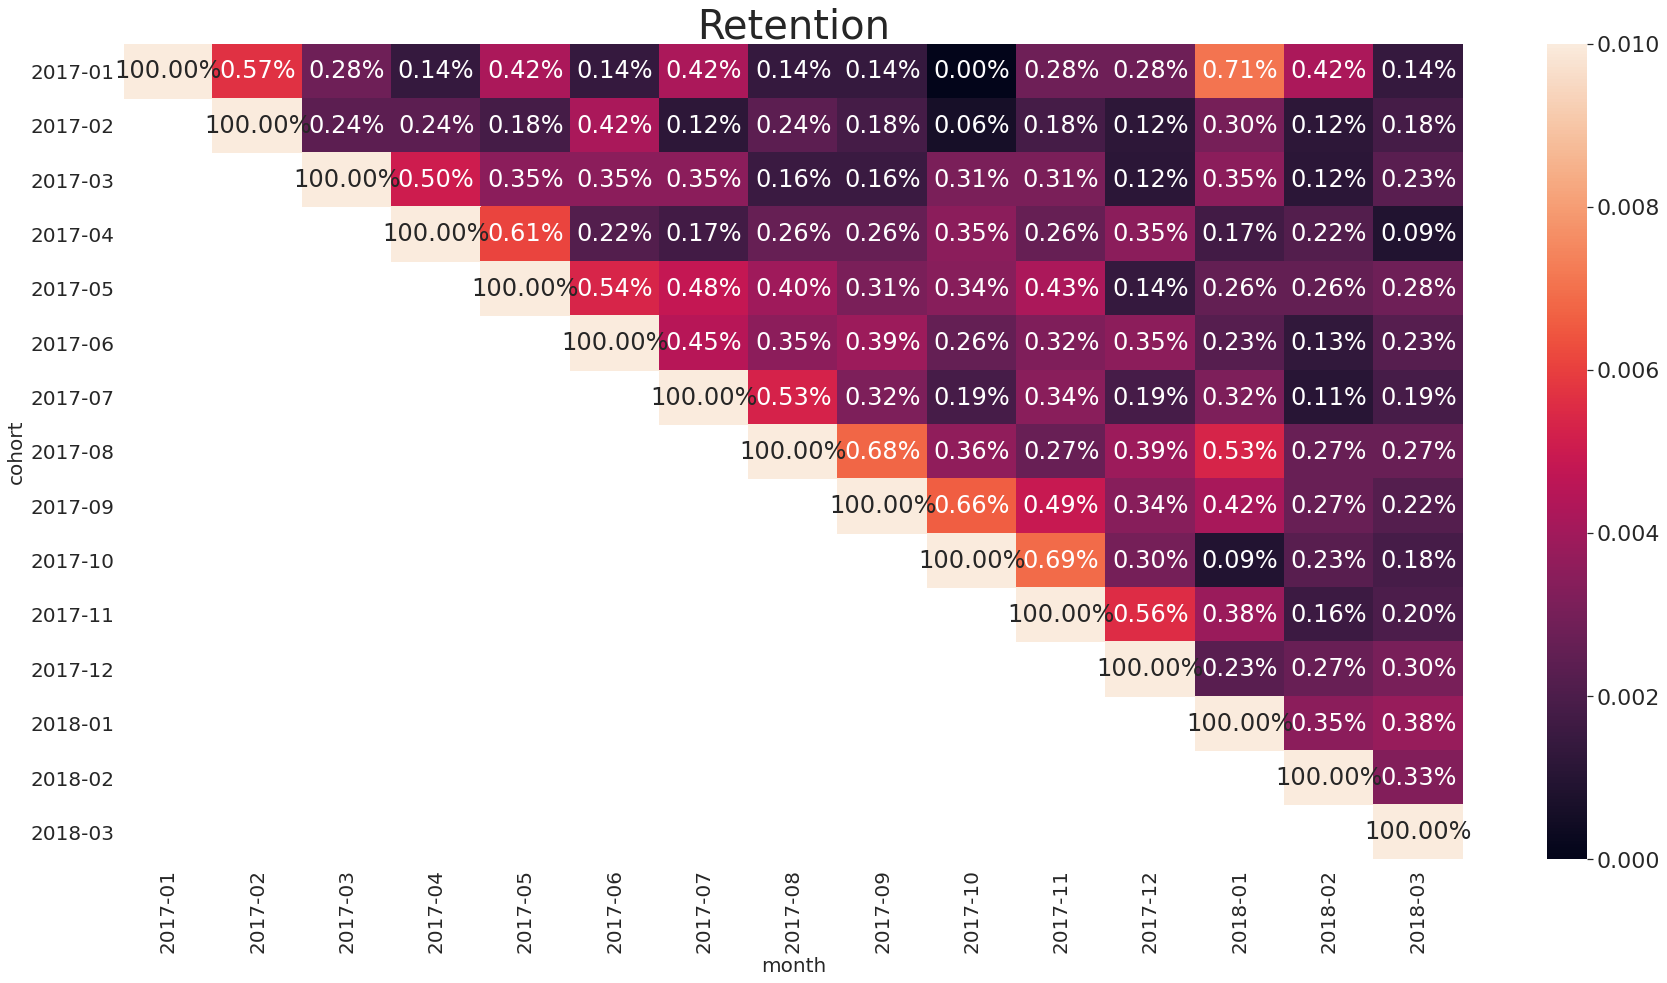

In [102]:
plt.figure(figsize=(30, 15))
plt.title('Retention', size=40)

sns.heatmap(retention, mask=retention.isnull(), annot=True, fmt='0.2%', vmin=0.0, vmax=0.01) 

plt.yticks(rotation=0, size=20)
plt.xticks(size=20)
plt.xlabel('month', fontsize=20)
plt.ylabel('cohort', fontsize=20)
plt.show()

интересно, что у кагорты 2017-01 не было совсем покупок в октябре,
а в январе 2018 retention максимамальный 

### Ответ :
__Самый высокий показатель retention на третий месяц у кагорты  2017-05 - 0.4%__


 

---

---

### RFM

##### Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.
        

- __R__ - время от последней покупки пользователя до текущей даты
- __F__ - суммарное количество покупок у пользователя за всё время
- __M__ - сумма покупок за всё время.


In [103]:
full_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-07


In [104]:
rfm = full_df.query('order_status == @order_status_pay').dropna(subset=['order_approved_at']) 

# отфильтравал по интересующим статусам покупок, удалил заказы без подтверждения оплаты


In [105]:
rfm = rfm.groupby('customer_unique_id') \
            .agg({'order_approved_at': 'max', \
                  'order_id': 'nunique', \
                  'price': 'sum'}).reset_index()
    
# создадим таблицу где по каждому пользователю будет последняя дата покупки, суммарное количество покупок
# и суммарное количество потраченных денег

In [106]:
rfm.head()

,customer_unique_id,order_approved_at,order_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,1,18.90
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,1,180.00


In [107]:
len(rfm)

94674

In [108]:
rfm.order_approved_at.max()

Timestamp('2018-09-03 17:40:06')

In [109]:
time_now = rfm['order_approved_at'].max() + timedelta(days=1)

# за переменную time_now будем считать текущую дату, она нам потребуются для формирования метрики recency.
# к максимальной дате покупки добавим один день

In [110]:
time_now

Timestamp('2018-09-04 17:40:06')

In [111]:
rfm['order_approved_at'] = rfm.order_approved_at.apply(lambda x: (time_now-x).days)
# посчитаем время от последней покупки пользователя до текущей даты для всей таблицы

In [112]:
rfm.columns = ['customer', 'recency', 'frequency', 'monetary']

#переименуюм все колонки

In [113]:
rfm.head()

,customer,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


In [114]:
rfm.describe()

# сразу можно заметить что как минимум у 75 процетов пользователей всего одна покупка.
# Сильный прирост в сумме потраченных денег от 75 перцентиля до максимально значения
# для наглядности построим графики

,recency,frequency,monetary
count,94674.000000,94674.000000,94674.000000
mean,243.288918,1.033790,141.867925
std,152.800159,0.210699,215.722446
min,1.000000,1.000000,0.850000
25%,119.000000,1.000000,47.800000
50%,224.000000,1.000000,89.800000
75%,352.000000,1.000000,154.910000
max,719.000000,16.000000,13440.000000


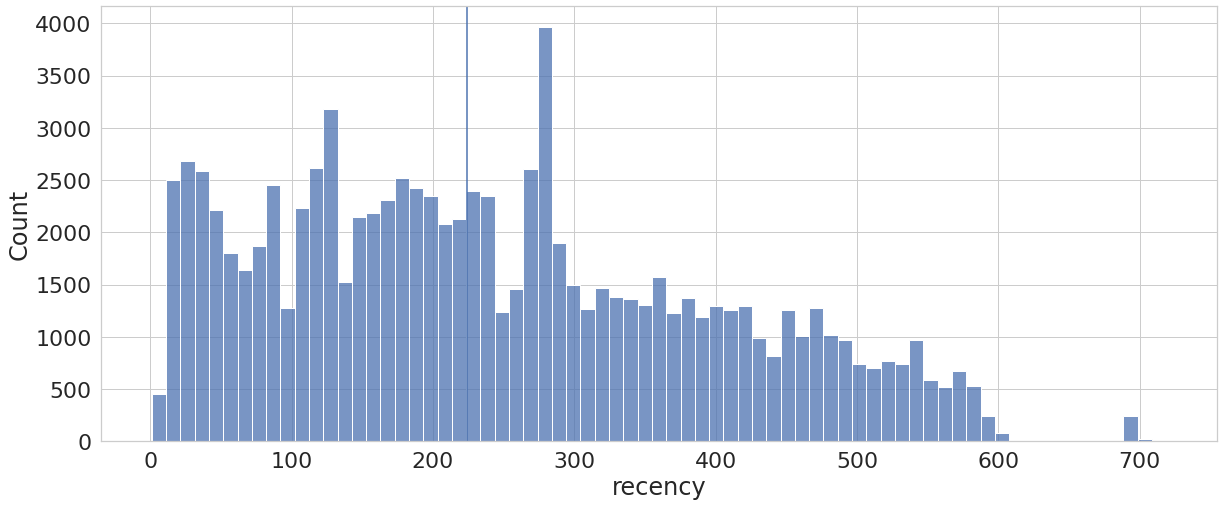

In [115]:
sns.histplot(rfm.recency)
plt.axvline(x=rfm.recency.median());


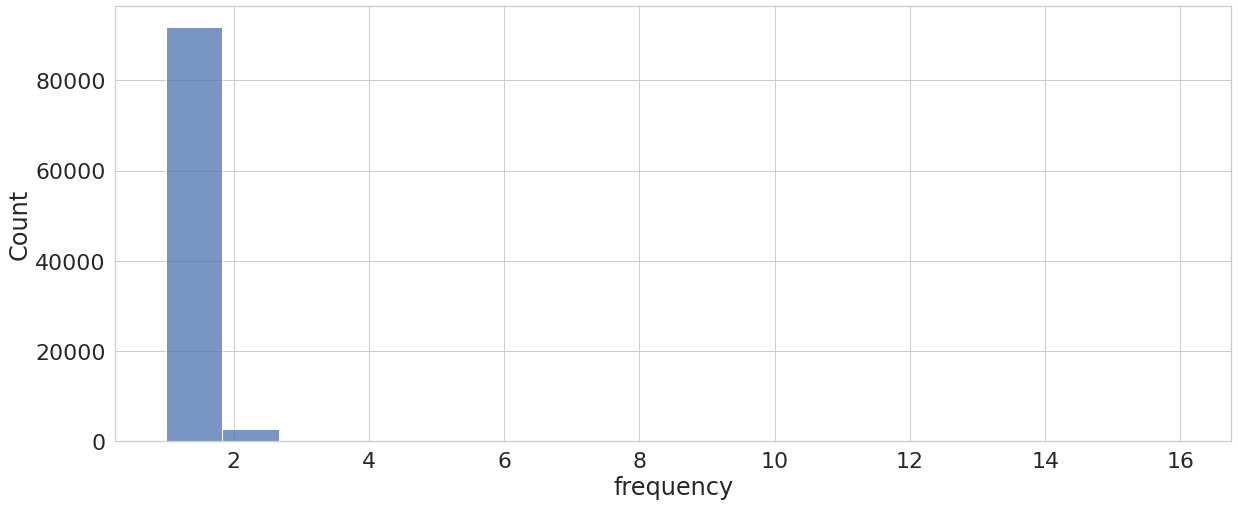

In [116]:
sns.histplot(rfm.frequency);

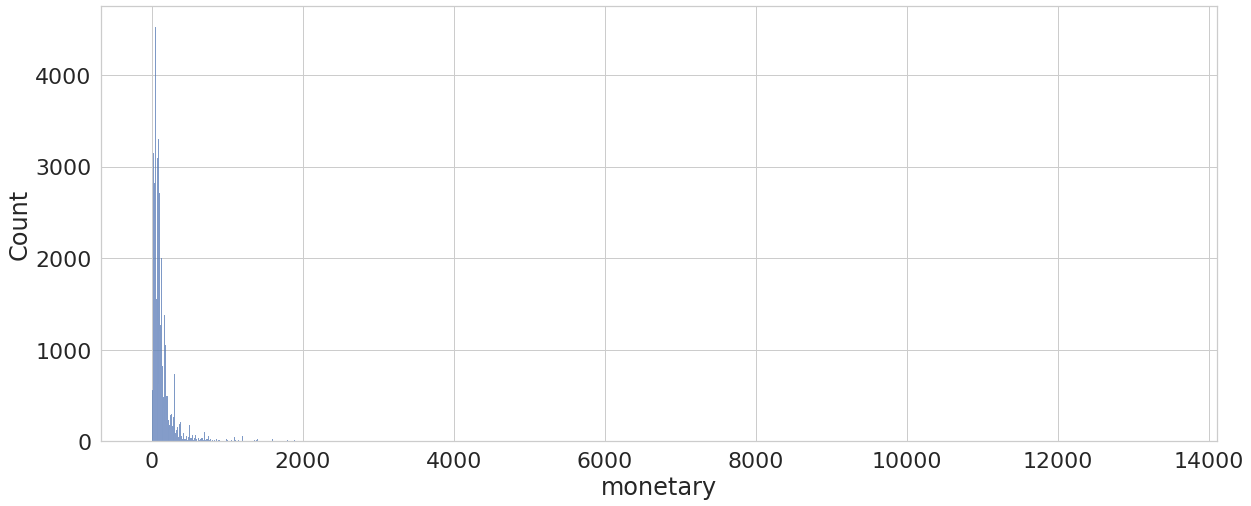

In [117]:
sns.histplot(rfm.monetary);

In [118]:
rfm.frequency.value_counts()

1     91803
2      2636
3       187
4        29
5         9
6         5
7         3
16        1
9         1
Name: frequency, dtype: int64

In [119]:
quintiles = rfm[['monetary']].quantile([.33, .66])
quintiles['frequency'] = [1, 3]
quintiles['recency'] = [100, 365]
quintiles = quintiles.to_dict()
quintiles



#создадим новый ДФ где будет один столбец monetary со значениями квантиля, а в индексах будут сами квантили
# добавим колонку requency где по индексу 0.33 будет 1 (1 покупка )
                            # по индесксу 0.66 будет 3 (от 2 до 3 покупок)
# добавим колонку recency где по индексу 0.33 будет 100 (спрошло не более 100 дней )
                            # по индесксу 0.66 будет 365 (прошло от 100 до 365 дней)
# преобразуем ДФ в словарь

{'monetary': {0.33: 57.99, 0.66: 124.99},
 'frequency': {0.33: 1, 0.66: 3},
 'recency': {0.33: 100, 0.66: 365}}

In [120]:
# создадим функции которые будут нам возвращать значения (1, 2, 3) по заданным ключам (0.33, 0.66)
# из ранее созданного словаря quintiles


def r_score(x):
    if x <= quintiles['recency'][.33]:
        return 3
    elif x <= quintiles['recency'][.66]:
        return 2
    else:
        return 1

def f_score(y):
    if y <= quintiles['frequency'][.33]:
        return 1
    elif y <= quintiles['frequency'][.66]:
        return 2
    else:
        return 3

def m_score(z):
    if z <= quintiles['monetary'][.33]:
        return 1
    elif z <= quintiles['monetary'][.66]:
        return 2
    else:
        return 3

In [121]:
rfm['r'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['f'] = rfm['frequency'].apply(lambda y: f_score(y))
rfm['m'] = rfm['monetary'].apply(lambda z: m_score(z))

# применим функции ко всем значениям таблицы rfm с добавлением трех новых колонок,
# которые будут отображать значения из примененных функция    

таким образом получаем:
- r:1 - последняя покупка была более чем 365 дней назад
- r:2 - последняя покупка была от 100 до 365 дней назад
- r:3 - последняя покупка была не более чем 100 дней назад
---   
- f:1 - всего одна покупка за все время
- f:2 - от 2 до 3 покупок за все время
- f:3 - от 4 покупок за все время
---
- m:1 - пользователь потратил денег меньше или равно 33 квантилю
- m:2 - пользователь потратил денег больше 33 квантиля и меньше или равно 66 квантилю
- m:3 - пользователь потратил денег больше 66 квантиля

In [122]:
rfm.head()

,customer,recency,frequency,monetary,r,f,m
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,2,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,2,1,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3


In [123]:
rfm['RFM'] = rfm.r.map(str) + rfm.f.map(str) + rfm.m.map(str)

# склеим

In [124]:
rfm.head()

,customer,recency,frequency,monetary,r,f,m,RFM
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,2,1,3,213
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,2,1,3,213


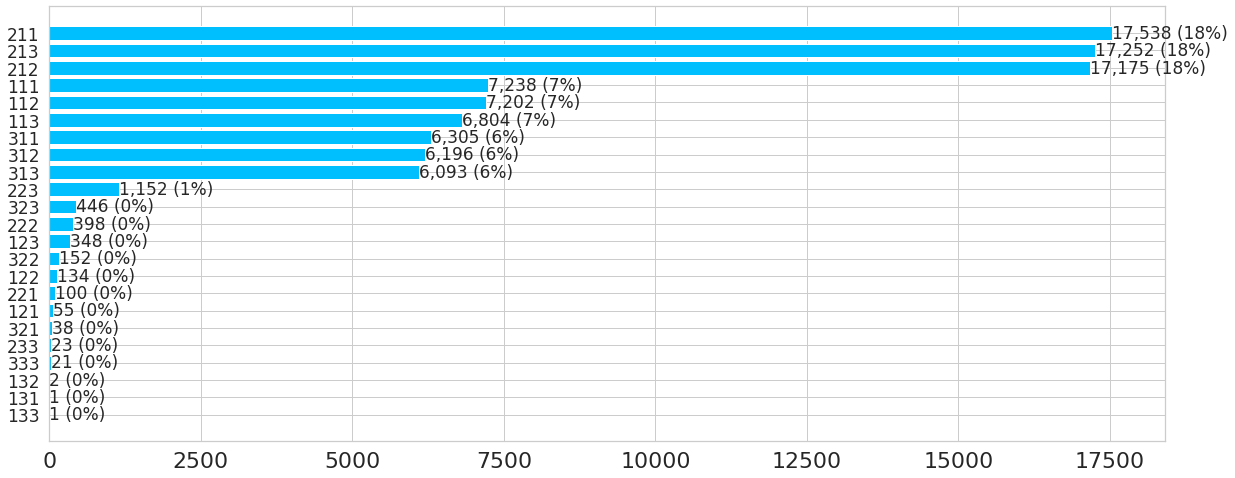

In [125]:
# визуализация

segments_counts = rfm['RFM'].value_counts().sort_values()

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
               segments_counts, color='#00BFFF')

ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index, size=17)

for i, bar in enumerate(bars):
    value = bar.get_width()
    ax.text(value,
            bar.get_y() + bar.get_height() / 2,
            '{:,} ({:}%)'.format(int(value),
                                 int(value * 100 / segments_counts.sum())),
            va='center', ha='left', size=17)

In [126]:
result = rfm.RFM.value_counts().to_frame()

In [127]:
result['score%'] = rfm.RFM.value_counts(normalize=True)*100

In [128]:
result = result.reset_index()

result.columns = ['RFM', 'score', 'score%']

In [129]:
result

,RFM,score,score%
0,211,17538,18.524621
1,213,17252,18.222532
2,212,17175,18.141200
3,111,7238,7.645182
4,112,7202,7.607157
5,113,6804,7.186767
6,311,6305,6.659695
7,312,6196,6.544563
8,313,6093,6.435769
9,223,1152,1.216807


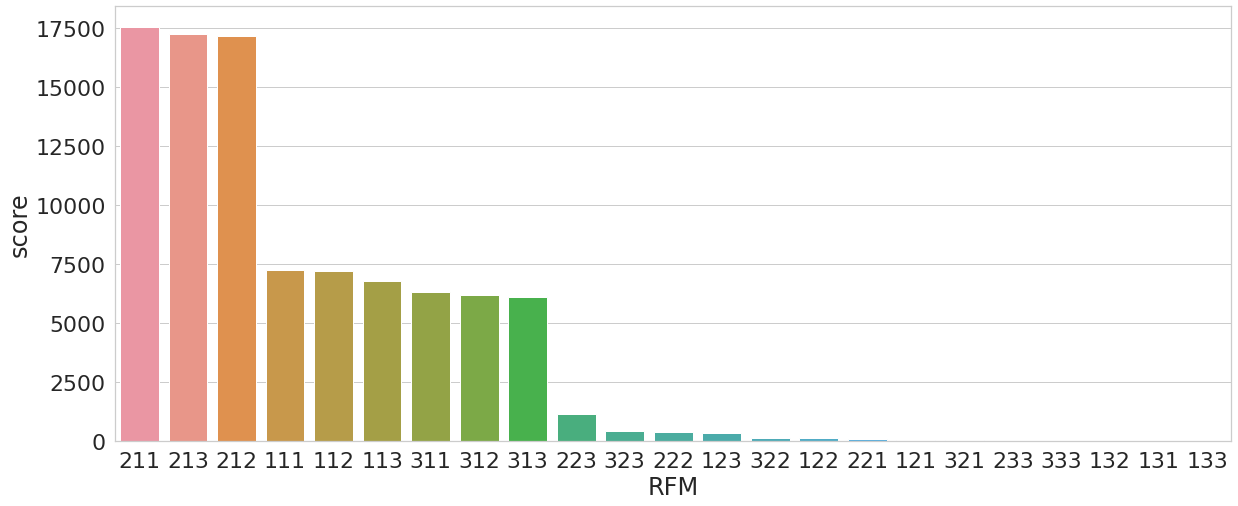

In [130]:
sns.barplot(data=result, x='RFM', y='score');

In [131]:
result.head(9)['score%'].sum()

96.96748843399455

### Вывод

R1—F1—M(1–3) — потерянные;      
R1—F(2–3)—M(1–3) — лояльные клиенты, потерявшие активность;       
R2—F(1–2)—M(1–3) — спящие;     
R2—F(3)—M(1–3) — лояльные спящие клиенты;    
R3—F1—M(1–3) — новички;     
R3—F2—M(1–3) — развивающиеся;    
R3—F3—M3 — постоянные.

#### Почти 97% наших пользователей относятся к первым 9 кластерам рассмотрим их

топ-3 это кластеры: 211, 213, 212 (спящие и лояльные спящие). Нам нужно попробовать их расшевелить, ввести стимулирующими акции для них.

111, 112, 113 -  пользователи, которые давно ушли нас и не были постоянными клиентами. Слишком много тратить на них не нужно, можно как нибудь напомнить о нас

311, 312, 313 - наши новички и развивающиеся клиенты, нужно их заинтересовать как следует


